In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

Narrative:

On 13 December 2022, 7:00am ET (U.S. Easter Time, NY Time), Moderna and Merck announced that mRNA-4157/V940, a cancer vaccine, demonstrated a statistically significant and clinically meaningful reduction in the risk of disease recurrence or death compared to KEYTRUDA monotherapy in stage III/IV melanoma patients. 

The regular trading hours for the U.S. stock market, which includes the Nasdaq Stock Market (Nasdaq) and the New York Stock Exchange (NYSE) are 9:30 a.m. to 4 p.m. Below, we see the recent traded stock price of Moderna Inc (MRNA, NASQAQ).

Requirements:

Perform an event study on this corporate announcement on 13 December 2022. Use the testing framework:  240 prior trading days for estimation, and the 21 days for event window. Download the necessary data Moderna.csv from ELEARN.SPX_Ret is the continuously compounded daily return rate on the S&P 500 Index. Use this to represent the U.S. market return. MRNA_Ret is the continuously compounded return rate of Moderna stock. (Ignore dividends in the computations.) 

Then answer the following 5 Questions.



# Q1 Which are the market model abnormal returns on event day -10, 0, 10 relative to the announcement by Modema and Merck?

In [26]:
#240 days for estimation
#21days for event window
df = pd.read_csv("Moderna.csv")

#323 as event day index
#10: 324-333
#-10: 313-322
#240: 73-312
print(df[df['Date'] == '13-Dec-22'].index[0]) #previous ten days:313-322

# market model
df1=df.copy()
df2=df1.iloc[73:313,]

x2 = df2['SPX_Ret']
y2 = df2['MRNA_Ret']
x2 = sm.add_constant(x2)
model = sm.OLS(y2, x2).fit()
predictions = model.predict(x2)

results = model.summary()
print(results)

#21 days as event windows
#323 as event day index
#10: 324-333
#-10: 313-322
df3 = df.iloc[313:334,].copy()
df3

x3 = df3['SPX_Ret']
y3 = df3['MRNA_Ret']
C = model.params

AR = y3 - C.iloc[0] - C.iloc[1]*x3
AR[313],AR[323],AR[333]

323
                            OLS Regression Results                            
Dep. Variable:               MRNA_Ret   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     96.14
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           2.78e-19
Time:                        12:37:08   Log-Likelihood:                 452.17
No. Observations:                 240   AIC:                            -900.3
Df Residuals:                     238   BIC:                            -893.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.002     -0.381     

(-0.009444726518913066, 0.16897606585750027, -0.0011222794594636688)

# Q2 What are the cumulative returns on event day -1,0,1 based on the market model?

In [36]:
CAR = AR.cumsum()
CAR[322],CAR[323],CAR[324]

(-0.061402286499275927, 0.10757377935822435, 0.17394828394708153)

# Q3

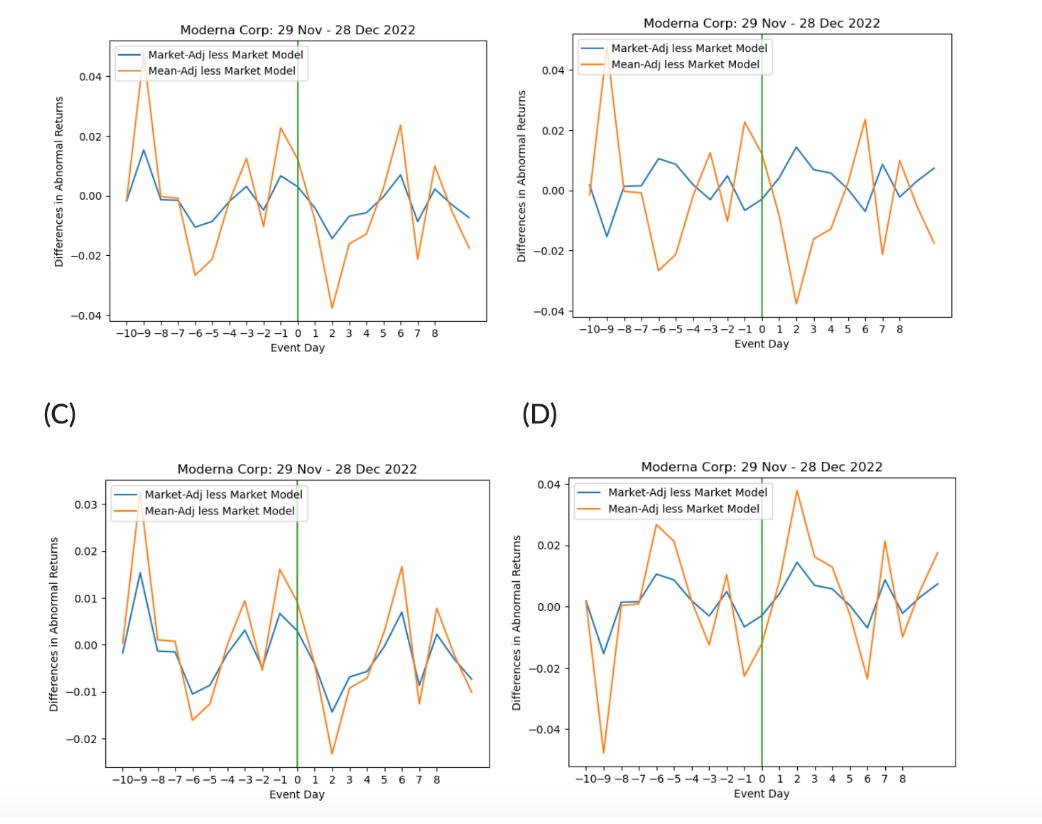

In [38]:
#Market Adjusted Return
#df3 = df.iloc[313:334,].copy()
# x3 = df3['SPX_Ret']
# y3 = df3['MRNA_Ret']
MAR = y3-x3

#Mean Adjusted Return
#df2=df1.iloc[73:313,]
#y2 = df2['MRNA_Ret']
MeAR = y3 - np.mean(y2)

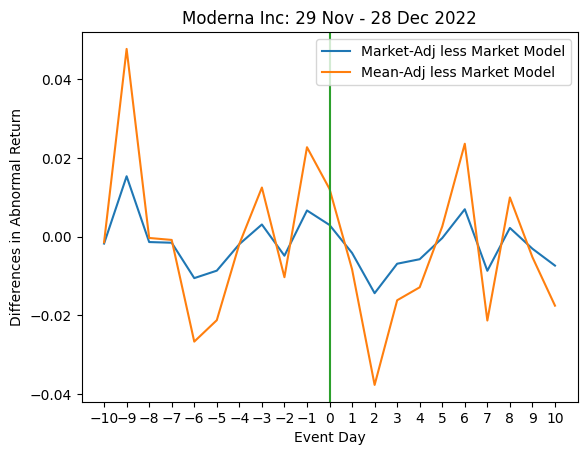

In [44]:
time = range(-10,11,1)  ### range(start, stop, step)

plt.plot(time, MAR-AR, label='Market-Adj less Market Model')
plt.plot(time, MeAR-AR, label='Mean-Adj less Market Model')

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-1, 3), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Differences in Abnormal Return')
  
# giving a title to my graph
plt.title('Moderna Inc: 29 Nov - 28 Dec 2022')
plt.legend()
  
# function to show the plot
plt.show()

# Q4 What is the t-statistic and 2-tailed p-value of the market model abnormal return on event day 0?

In [53]:
#Market Adjusted Return
#df3 = df.iloc[313:334,].copy()
# x3 = df3['SPX_Ret']
# y3 = df3['MRNA_Ret']
# MAR = y3-x3

sd2 = np.std(y2-x2['SPX_Ret'])
t_stat_MAR = MAR[323]/sd2
print(t_stat_MAR)

from scipy.stats import t
t_value = 4.565477
###
sample_size = 260
df = sample_size - 1

p_value = 2 * (1 - t.cdf(t_value, df))
p_value

4.565477064495366


7.708271215323137e-06

# Q5 Looking at the graphs and t-statistics, which conclusion is most appropriate about the Modema and Merck announcement?

semi-strong form

In [51]:
sd2 = np.std(y2-x2['SPX_Ret'])
t_stat_MAR = MAR/sd2
t_stat_MAR

313   -0.297481
314   -0.389367
315    0.850750
316    0.158724
317   -0.472241
318    0.021926
319    0.872016
320    0.633357
321   -0.882349
322   -2.272066
323    4.565477
324    1.652200
325    0.453197
326   -1.554193
327   -0.230960
328    1.503346
329    0.755105
330    0.170743
331   -1.362529
332   -2.542304
333   -0.225334
dtype: float64